In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from nltk import sent_tokenize

In [3]:
questions =  pd.read_parquet('/Users/hungnguyen/Masters/StackOverFlow-MBDProject/data/questions-with-ans-and-metrics-cluster-FINAL-INCL-EVERYTHING.parquet')

In [4]:
questions.head()

,_Id,_PostTypeId,_AcceptedAnswerId,_CreationDate,_Score,_ViewCount,_Title,_Tags,_AnswerCount,_CommentCount,...,AnswerDurationDays,AnswerDurationMinute,AnswerDurationHour,Flesch_Kincard_Grade,Flesch_reading_ease,Coleman_Liau_index,code_percentage,cos_sim_post_title,cos_sim_title_tag,sentiment
0,30036090,1,30036476,2015-05-04 15:22:20.737,1,701,Why is real time more than user+system+total?,<ruby><benchmarking>,1,3,...,0,21.916667,0.365278,21.64426229508197,48.53147540983609,13.596721311475406,0.6214896214896215,0.22587896923080247,0.0,0.0
1,10295106,1,10296274,2012-04-24 07:20:36.353,0,365,"Runtime error 1004, and sometimes overflow error",<vba><excel>,1,9,...,0,77.500000,1.291667,6.343888888888891,81.64000000000001,11.873888888888885,0.7071778140293637,0.17961102724039416,0.0,0.1007
2,22065385,1,22065926,2014-02-27 09:17:30.977,0,397,Memory allocation for an initialized variable ...,<java><memory-management>,2,5,...,0,19.366667,0.322778,3.742366197183099,93.52340845070422,13.420281690140843,0.1,0.10335609168833636,0.26951761324603224,0.8277
3,38230523,1,38231646,2016-07-06 15:49:38.077,2,277,Qt: Screen Shot,<qt><screenshot><rgb><rgba><qpixmap>,1,3,...,0,61.566667,1.026111,6.849043478260871,78.73073913043481,15.186956521739123,0,0.02219895884706716,0.1506401849870651,0.8834
4,10613051,1,10748100,2012-05-16 04:21:09.040,2,307,Let VB Form prepare working environment in cho...,<vb.net><visual-studio-2008><embedded-resource>,1,5,...,9,12784.500000,213.075000,7.66152520465317,74.29815596725551,14.620663507108997,0.18939929328621907,0.10748887273786664,0.06804963087832473,0.5274


In [5]:
questions.count()

_Id                           1186150
_PostTypeId                   1186150
_AcceptedAnswerId             1186150
_CreationDate                 1186150
_Score                        1186150
_ViewCount                    1186150
_Title                        1186150
_Tags                         1186150
_AnswerCount                  1186150
_CommentCount                 1186150
_FavoriteCount                 318194
AnswerId                      1186150
                              1186150
AcceptedAnswerCreationDate    1186150
TagsList                      1186150
metrics                       1186150
AnswerDurationSeconds         1186150
AnswerDurationDays            1186150
AnswerDurationMinute          1186150
AnswerDurationHour            1186150
Flesch_Kincard_Grade          1185595
Flesch_reading_ease           1185595
Coleman_Liau_index            1185595
code_percentage               1186150
cos_sim_post_title            1186150
cos_sim_title_tag             1186150
sentiment   

([<matplotlib.axis.YTick at 0x322c5f760>,
 [Text(0, 0, '0'),
  Text(0, 200000, '2'),
  Text(0, 400000, '4'),
  Text(0, 600000, '6'),
  Text(0, 700000, '7')])

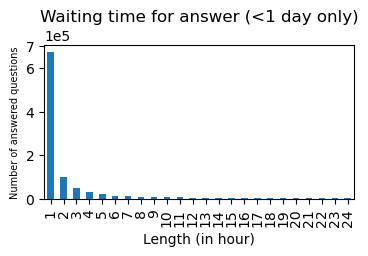

In [45]:
max_hour = questions.AnswerDurationHour.max()
x = 'AnswerDurationHour'
binsHr = np.linspace(0, 24, 25).tolist()
questions['binsHr'] = pd.cut(questions[x], bins=binsHr, include_lowest=True)
questions.groupby('binsHr')[x].count().plot.bar()
plt.title('Waiting time for answer (<1 day only)')
plt.xlabel('Length (in hour)')
plt.ylabel('Number of answered questions', fontsize=7)
binsHrTick = np.linspace(1, 24, 24).astype(int).tolist()
plt.xticks(list(range(len(binsHrTick))), binsHrTick)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.yticks([0, 200000, 400000, 600000, 700000])

-531375.9333333333 6653436.166666667


([<matplotlib.axis.XTick at 0x2fe28c610>,
 [Text(0, 0, '1'),
  Text(1, 0, ''),
  Text(2, 0, ''),
  Text(3, 0, ''),
  Text(4, 0, '5'),
  Text(5, 0, ''),
  Text(6, 0, ''),
  Text(7, 0, ''),
  Text(8, 0, ''),
  Text(9, 0, '10'),
  Text(10, 0, ''),
  Text(11, 0, ''),
  Text(12, 0, ''),
  Text(13, 0, ''),
  Text(14, 0, '15'),
  Text(15, 0, ''),
  Text(16, 0, ''),
  Text(17, 0, ''),
  Text(18, 0, ''),
  Text(19, 0, '20'),
  Text(20, 0, ''),
  Text(21, 0, ''),
  Text(22, 0, ''),
  Text(23, 0, ''),
  Text(24, 0, '25'),
  Text(25, 0, ''),
  Text(26, 0, ''),
  Text(27, 0, ''),
  Text(28, 0, ''),
  Text(29, 0, '30'),
  Text(30, 0, ''),
  Text(31, 0, ''),
  Text(32, 0, ''),
  Text(33, 0, ''),
  Text(34, 0, '35'),
  Text(35, 0, ''),
  Text(36, 0, ''),
  Text(37, 0, ''),
  Text(38, 0, ''),
  Text(39, 0, '40'),
  Text(40, 0, ''),
  Text(41, 0, ''),
  Text(42, 0, ''),
  Text(43, 0, ''),
  Text(44, 0, '45'),
  Text(45, 0, ''),
  Text(46, 0, ''),
  Text(47, 0, ''),
  Text(48, 0, ''),
  Text(49, 0, '50')

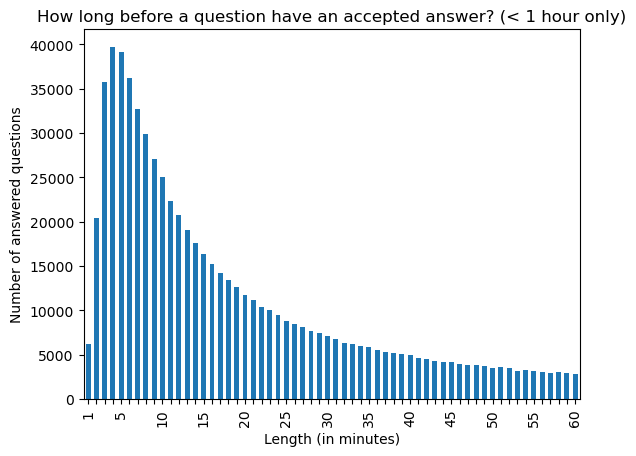

In [6]:
max_minutes = questions.AnswerDurationMinute.max()
min_minutes = questions.AnswerDurationMinute.min()
print(min_minutes, max_minutes)
binsMin = np.linspace(0, 60, 61).tolist()
list_printed = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55]
binsTick = [1, None, None, None]
for i in range(len(list_printed)):
    binsTick.append(list_printed[i])
    for _ in range(4):
        binsTick.append(None)
binsTick.append(60)

questions['binsMin'] = pd.cut(questions.AnswerDurationMinute, bins=binsMin, include_lowest=True)
questions.groupby('binsMin')['AnswerDurationMinute'].count().plot(kind='bar', width=0.6)
plt.title('How long before a question have an accepted answer? (< 1 hour only)')
plt.xlabel('Length (in minutes)')
plt.ylabel('Number of answered questions')
plt.xticks(list(range(len(binsTick))), binsTick)



In [7]:
questions[['Flesch_Kincard_Grade', 'Flesch_reading_ease', 'Coleman_Liau_index', 'code_percentage', 'cos_sim_post_title', 'cos_sim_title_tag', 'AnswerDurationMinute', 'sentiment']] = questions[['Flesch_Kincard_Grade', 'Flesch_reading_ease', 'Coleman_Liau_index', 'code_percentage', 'cos_sim_post_title', 'cos_sim_title_tag', 'AnswerDurationMinute','sentiment']].astype('float')

In [8]:


questions[questions.AnswerDurationDays > 1][['code_percentage', 'cos_sim_post_title', 'cos_sim_title_tag', 'AnswerDurationMinute', '_Score', '_ViewCount', 'Flesch_reading_ease', 'sentiment', 'Flesch_reading_ease']].corr()

,code_percentage,cos_sim_post_title,cos_sim_title_tag,AnswerDurationMinute,_Score,_ViewCount,Flesch_reading_ease,sentiment,Flesch_reading_ease
code_percentage,1.000000,-0.163681,-0.066687,-0.073215,-0.037191,-0.025432,0.053274,-0.121714,0.053274
cos_sim_post_title,-0.163681,1.000000,0.004793,0.029604,0.021273,0.025577,-0.002837,0.032727,-0.002837
cos_sim_title_tag,-0.066687,0.004793,1.000000,0.023899,0.020957,0.029948,-0.012656,0.006478,-0.012656
AnswerDurationMinute,-0.073215,0.029604,0.023899,1.000000,0.117402,0.135987,0.013850,0.004928,0.013850
_Score,-0.037191,0.021273,0.020957,0.117402,1.000000,0.819059,0.011305,-0.003746,0.011305
_ViewCount,-0.025432,0.025577,0.029948,0.135987,0.819059,1.000000,0.017337,-0.013206,0.017337
Flesch_reading_ease,0.053274,-0.002837,-0.012656,0.013850,0.011305,0.017337,1.000000,0.085469,1.000000
sentiment,-0.121714,0.032727,0.006478,0.004928,-0.003746,-0.013206,0.085469,1.000000,0.085469
Flesch_reading_ease,0.053274,-0.002837,-0.012656,0.013850,0.011305,0.017337,1.000000,0.085469,1.000000


4620


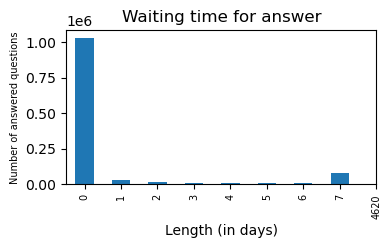

In [49]:
max_days = questions.AnswerDurationDays.max()
print(max_days)

binsDay = [0, 1, 2, 3, 4, 5, 6, 7, max_days]
questions['binsDay'] = pd.cut(questions.AnswerDurationDays, bins=binsDay,include_lowest=True)
# plt.xticks(bins)
questions.groupby('binsDay')['AnswerDurationDays'].count().plot.bar()
plt.title('Waiting time for answer')
plt.xlabel('Length (in days)')
plt.ylabel('Number of answered questions', fontsize=7)
plt.xticks(list(range(len(binsDay))), binsDay)
# plt.rcParams["figure.figsize"] = (4, 2)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))


[0, 1, 6.0, 12.0, 18.0, 24.0, 30.0, 36.0, 42.0, 48.0, 54.0, 60.0]


Text(0, 0.5, 'Number of answered questions')

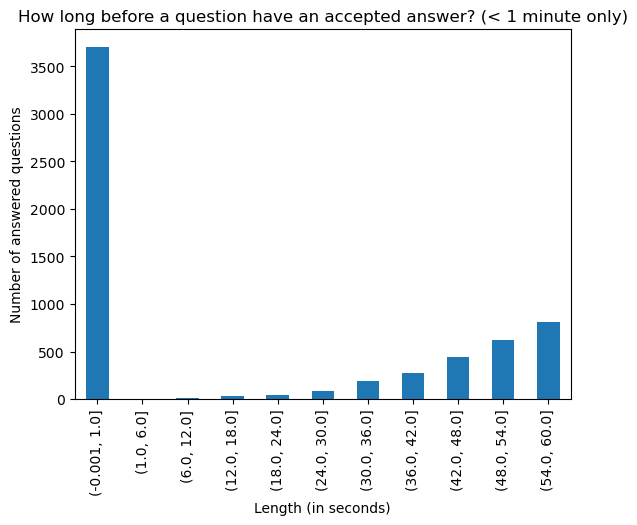

In [10]:
binsSec = [0, 1]
binsSec += np.linspace(6, 60, 10).tolist()
print(binsSec)
questions['binsSec'] = pd.cut(questions.AnswerDurationSeconds, bins=binsSec, include_lowest=True)
questions.groupby('binsSec')['AnswerDurationSeconds'].count().plot.bar()
plt.title('How long before a question have an accepted answer? (< 1 minute only)')
plt.xlabel('Length (in seconds)')
plt.ylabel('Number of answered questions')
# plt.xticks(list(range(len(binsSec))), binsSec)


0.9999622570296283


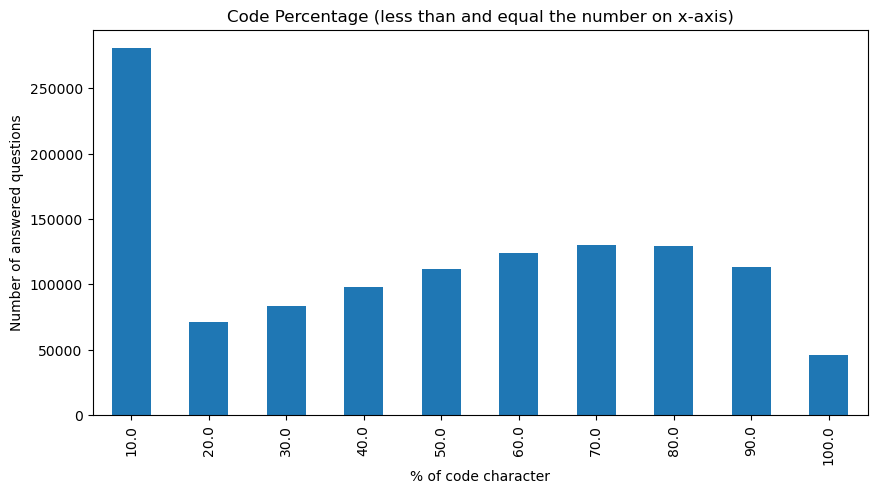

In [83]:
max_codes = questions.code_percentage.max()
print(max_codes)
binsCode = np.linspace(0, max_codes, 11).tolist()
binsCode_tick = []
for elem in binsCode:
    if elem == 0:
        continue
    binsCode_tick.append(round(elem * 100, 2))
questions['binsCode'] = pd.cut(questions.code_percentage, bins=binsCode, include_lowest=True)
# plt.xticks(bins)
questions.groupby('binsCode')['code_percentage'].count().plot.bar()
plt.title('Code Percentage (less than and equal the number on x-axis)')
plt.xlabel('% of code character')
plt.ylabel('Number of answered questions')
plt.xticks(list(range(len(binsCode_tick))), binsCode_tick)
plt.savefig('/Users/hungnguyen/Masters/StackOverFlow-MBDProject/fig/codeper.png')
plt.rcParams["figure.figsize"] = (10, 4)


Text(0, 0.5, 'Number of answered questions')

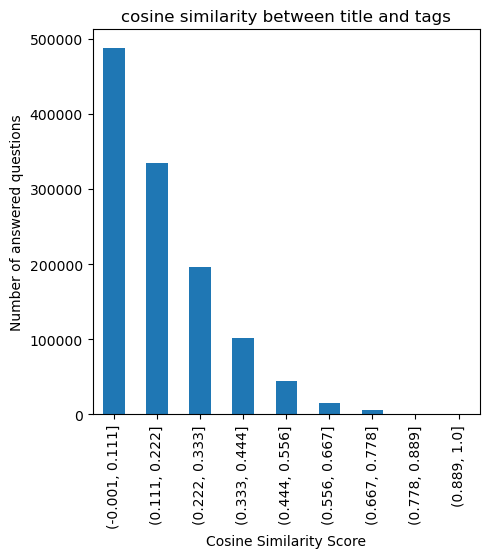

In [77]:
max_cstt = questions.cos_sim_title_tag.max()
min_cstt = questions.cos_sim_title_tag.min()
binscstt = np.linspace(min_cstt, max_cstt, 10).tolist()

questions['binscstt'] = pd.cut(questions.cos_sim_title_tag, bins=binscstt, include_lowest=True)
# plt.xticks(bins)
questions.groupby('binscstt')['cos_sim_title_tag'].count().plot.bar()
plt.title('cosine similarity between title and tags')
plt.xlabel('Cosine Similarity Score')
plt.ylabel('Number of answered questions')

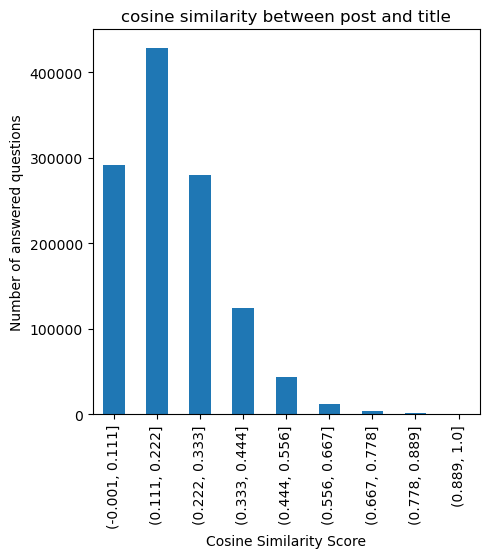

In [78]:
max_cspt = questions.cos_sim_post_title.max()
min_cspt = questions.cos_sim_post_title.min()
binscspt = np.linspace(min_cspt, max_cspt, 10).tolist()

questions['binscspt'] = pd.cut(questions.cos_sim_post_title, bins=binscspt, include_lowest=True)
# plt.xticks(bins)
questions.groupby('binscspt')['cos_sim_post_title'].count().plot.bar()
plt.title('cosine similarity between post and title')
plt.xlabel('Cosine Similarity Score')
plt.ylabel('Number of answered questions')
plt.rcParams["figure.figsize"] = (5, 5)


190.705 -2712.65359562272


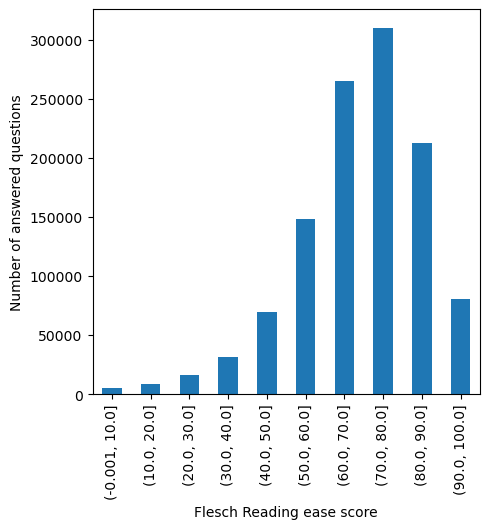

In [79]:
max_FRE = questions.Flesch_reading_ease.max()
min_FRE = questions.Flesch_reading_ease.min()
# binsfre = np.linspace(-192, -17, 2).tolist() + np.linspace(-16, 114, 10).tolist() + np.linspace(115, max_FRE, 2).tolist()
print(max_FRE, min_FRE)
binsfre = np.linspace(0, 100, 11).tolist()
questions['binsfre'] = pd.cut(questions.Flesch_reading_ease, bins=binsfre, include_lowest=True)
# plt.xticks(bins)
questions.groupby('binsfre')['Flesch_reading_ease'].count().plot.bar()
plt.xlabel('Flesch Reading ease score')
plt.ylabel('Number of answered questions')
plt.savefig('/Users/hungnguyen/Masters/StackOverFlow-MBDProject/fig/fre.png')


532.1182883098254 -12.843333333333334


Text(0, 0.5, 'Number of answered questions')

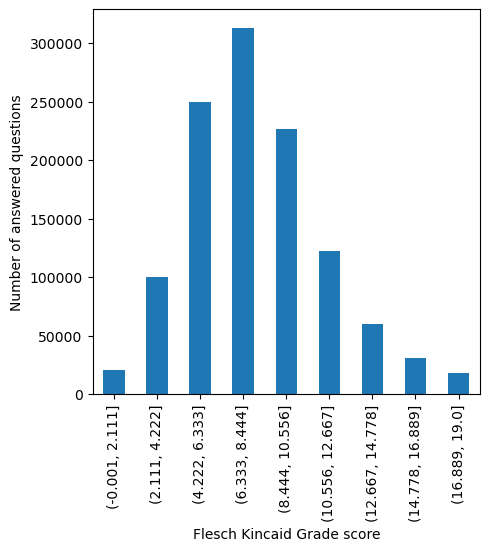

In [80]:
max_FKG = questions.Flesch_Kincard_Grade.max()
min_FKG = questions.Flesch_Kincard_Grade.min()
binsFKG = np.linspace(0, 19, 10).tolist()
print(max_FKG, min_FKG)
questions['binsFKG'] = pd.cut(questions.Flesch_Kincard_Grade, bins=binsFKG, include_lowest=True)
# plt.xticks(bins)
questions.groupby('binsFKG')['Flesch_Kincard_Grade'].count().plot.bar()
plt.xlabel('Flesch Kincaid Grade score')
plt.ylabel('Number of answered questions')

1029.7104761904761 -45.599999999999994


Text(0, 0.5, 'Number of answered questions')

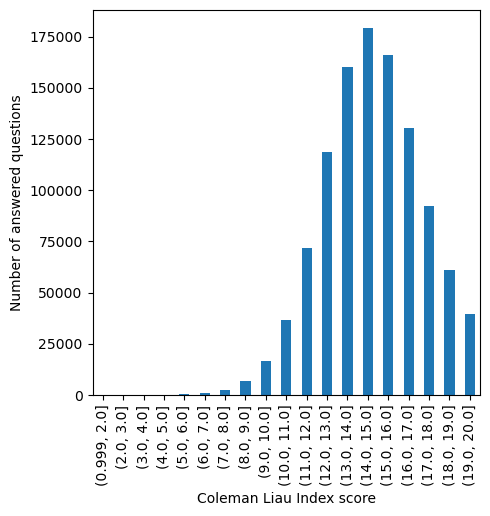

In [81]:
max_CLI = questions.Coleman_Liau_index.max()
min_CLI = questions.Coleman_Liau_index.min()
print(max_CLI, min_CLI)
binsCLI = np.linspace(1, 20, 20).tolist()

questions['binsCLI'] = pd.cut(questions.Coleman_Liau_index, bins=binsCLI, include_lowest=True)
# plt.xticks(bins)
questions.groupby('binsCLI')['Coleman_Liau_index'].count().plot.bar()
plt.xlabel('Coleman Liau Index score')
plt.ylabel('Number of answered questions')


0.9999 -0.9999


Text(0, 0.5, 'Number of answered questions')

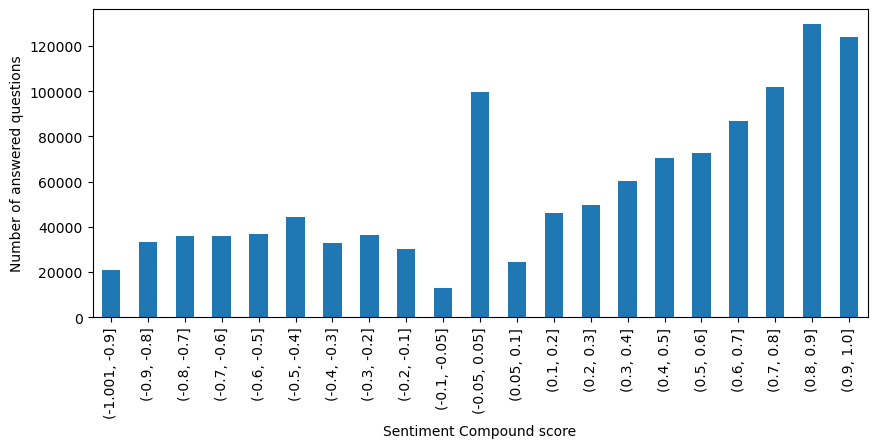

In [62]:
max_sent = questions.sentiment.max()
min_sent = questions.sentiment.min()
print(max_sent, min_sent)
bins_sent = np.linspace(-1, -0.1, 10).tolist() + [-0.05, 0.05] + np.linspace(0.1, 1, 10).tolist()
questions['bins_sent'] = pd.cut(questions.sentiment, bins=bins_sent, include_lowest=True)
# plt.xticks(bins)
questions.groupby('bins_sent')['sentiment'].count().plot.bar()
plt.xlabel('Sentiment Compound score')
plt.ylabel('Number of answered questions')


In [65]:
questions[questions.sentiment >= 0.5].count() / questions.count()

_Id                           0.434339
_PostTypeId                   0.434339
_AcceptedAnswerId             0.434339
_CreationDate                 0.434339
_Score                        0.434339
_ViewCount                    0.434339
_Title                        0.434339
_Tags                         0.434339
_AnswerCount                  0.434339
_CommentCount                 0.434339
_FavoriteCount                0.447937
AnswerId                      0.434339
                              0.434339
AcceptedAnswerCreationDate    0.434339
TagsList                      0.434339
metrics                       0.434339
AnswerDurationSeconds         0.434339
AnswerDurationDays            0.434339
AnswerDurationMinute          0.434339
AnswerDurationHour            0.434339
Flesch_Kincard_Grade          0.434542
Flesch_reading_ease           0.434542
Coleman_Liau_index            0.434542
code_percentage               0.434339
cos_sim_post_title            0.434339
cos_sim_title_tag        

In [66]:
questions[questions.AnswerDurationDays == 4620].iloc[0]

_Id                                                                      242417
_PostTypeId                                                                   1
_AcceptedAnswerId                                                      68089024
_CreationDate                                        2008-10-28 05:51:50.837000
_Score                                                                       24
_ViewCount                                                                19377
_Title                                          Looping through 2 lists at once
_Tags                                                                <c#><list>
_AnswerCount                                                                  8
_CommentCount                                                                 4
_FavoriteCount                                                              0.0
AnswerId                                                               68089024
                              <h1>Modern